Prerequisits: 
    tensorflow 2.10.x runs with python 3.7 or 3.8

## 0. Setup neede paths

In [5]:
import os

In [189]:
CUSTOM_MODEL_NAME = 'numberPlate_recogntinion' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [191]:
ROOT_PATH = r"C:\Users\nike.olabiyi\AI-repository\NumberPlateModel"
BASE_PATH = os.path.join('Tensorflow', 'workspace')

paths = {
    'ANNOTATION_PATH': os.path.join(BASE_PATH, 'annotations'),
    'SCRIPTS_PATH': os.path.join('Tensorflow', 'scripts'),
    'IMAGE_PATH': os.path.join(BASE_PATH, 'images'),
    'MODEL_PATH': os.path.join(BASE_PATH, 'tensorflow_models'),
    'PRETRAINED_MODEL_PATH': os.path.join(BASE_PATH, 'pretrained_ssd_model'),
    'CHECKPOINT_PATH': os.path.join(BASE_PATH, 'tensorflow_models', CUSTOM_MODEL_NAME),
    'APIMODEL_PATH': os.path.join('Tensorflow', 'tensorflow_object_det_api'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

print(paths)

{'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations', 'SCRIPTS_PATH': 'Tensorflow\\scripts', 'IMAGE_PATH': 'Tensorflow\\workspace\\images', 'MODEL_PATH': 'Tensorflow\\workspace\\tensorflow_models', 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pretrained_ssd_model', 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\tensorflow_models\\numberPlate_recogntinion', 'APIMODEL_PATH': 'Tensorflow\\tensorflow_object_det_api', 'PROTOC_PATH': 'Tensorflow\\protoc'}


In [193]:
files = {
    'PIPELINE_CONFIG':os.path.join(paths['CHECKPOINT_PATH'], 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [13]:
import os

for path in paths.values():
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)  # `exist_ok=True` prevents errors if the dir already exists
        print(f"Created directory: {path}")

## 1. Load TF Models Pretrained Models from Tensorflow Model API Zoo: 
https://github.com/tensorflow/models

can do manually or in here:

In [25]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
Cloning into 'Tensorflow\tensorflow_object_det_api'...
Updating files:  32% (1249/3894)
Updating files:  33% (1286/3894)
Updating files:  34% (1324/3894)
Updating files:  35% (1363/3894)
Updating files:  36% (1402/3894)
Updating files:  37% (1441/3894)
Updating files:  38% (1480/3894)
Updating files:  39% (1519/3894)
Updating files:  40% (1558/3894)
Updating files:  41% (1597/3894)
Updating files:  42% (1636/3894)
Updating files:  43% (1675/3894)
Updating files:  44% (1714/3894)
Updating files:  45% (1753/3894)
Updating files:  46% (1792/3894)
Updating files:  47% (1831/3894)
Updating files:  48% (1870/3894)
Updating files:  49% (1909/3894)
Updating files:  50% (1947/3894)
Updating files:  51% (1986/3894)
Updating files:  52% (2025/3894)
Updating files:  53% (2064/3894)
Updating files:  54% (2103/3894)
Updating files:  55% (2142/3894)
Updating files:  56% (2181/3894)
Updating files:  57% (222

In [56]:
# Get protocol needed for Tensorflow API compilation
import wget
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
filename = wget.download(url)

# Print the absolute path of the downloaded file
print("\nDownloaded file location:", os.path.abspath(filename))

100% [..........................................................................] 1468733 / 1468733
Downloaded file location: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\protoc-3.15.6-win64 (1).zip


In [58]:
# Move :
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}

        1 file(s) moved.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
os.chdir(r"C:\Users\nike.olabiyi\AI-repository\NumberPlateModel")

In [17]:
# Change directory to the PROTOC_PATH
os.chdir(paths['PROTOC_PATH'])
# Confirm that the working directory has changed
print("Current directory:", os.getcwd())

Current directory: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\protoc


In [88]:
# Now unzip the file: 
import zipfile
zip_path = "protoc-3.15.6-win64.zip"  # Ensure this is the correct filename

# Extract ZIP file in the current directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

print("Extraction completed in:", os.getcwd())

Extraction completed in: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\protoc


In [19]:
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
print(os.environ['PATH'])

C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\tensorFlowEnv\Scripts;C:\Program Files\CMake\bin;C:\Program Files (x86)\Windows Kits\10\Windows Performance Toolkit\;C:\Program Files\Python38\;C:\Program Files\Python38\Scripts\;C:\Users\nike.olabiyi\AppData\Local\Programs\Python\Python311\Scripts\;C:\Users\nike.olabiyi\AppData\Local\Programs\Python\Python311\;C:\Users\nike.olabiyi\AppData\Local\Microsoft\WindowsApps;C:\Users\nike.olabiyi\AppData\Local\Programs\Git\cmd;C:\Users\nike.olabiyi\AppData\Local\Programs\Python\Python313;C:\Users\nike.olabiyi\AppData\Local\Programs\Python\Python313\Scripts;C:\Users\nike.olabiyi\AppData\Local\GitHubDesktop\bin;C:\Users\nike.olabiyi\.dotnet\tools;C:\Program Files (x86)\Graphviz\bin;C:\Users\nike.olabiyi\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-7.1-full_build\bin;C:\Users\nike.olabiyi\AppData\Local\Programs\Python\Python36;C:\Users\nike.olabiyi\AppData\Local\Programs\Microsoft VS Code\bin

In [21]:
# go to reseach folder:
RESEARCH_PATH = os.path.abspath(os.path.join("..", "..", "Tensorflow", "tensorflow_object_det_api", "research"))

# Check if the path exists
if os.path.exists(RESEARCH_PATH):
    os.chdir(RESEARCH_PATH)
    print("Changed directory to:", os.getcwd())
else:
    print("ERROR: The directory does NOT exist:", RESEARCH_PATH)
    
# Change to the `research` directory
os.chdir(RESEARCH_PATH)

# Confirm the directory change
print("Current directory:", os.getcwd())

Changed directory to: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\tensorflow_object_det_api\research
Current directory: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\tensorflow_object_det_api\research


In [23]:
# Compile .proto files into Python files for TensorFlow's Object Detection API.
!protoc object_detection/protos/*.proto --python_out=.

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


### this is another way to see the progress:

In [25]:
import glob
import subprocess

# Get list of all .proto files
proto_files = glob.glob("object_detection/protos/*.proto")
print(proto_files)

# Run protoc on each file
# Run protoc on each file and capture output
for proto in proto_files:
    print(f"Compiling: {proto}")  # Show which file is being processed
    result = subprocess.run(["protoc", proto, "--python_out=."], capture_output=True, text=True)

    # Print output and errors (if any)
    if result.stdout:
        print(result.stdout)  # Show standard output
    if result.stderr:
        print(f"ERROR: {result.stderr}")  # Show errors if something went wrong

print("Compilation completed.")

['object_detection/protos\\anchor_generator.proto', 'object_detection/protos\\argmax_matcher.proto', 'object_detection/protos\\bipartite_matcher.proto', 'object_detection/protos\\box_coder.proto', 'object_detection/protos\\box_predictor.proto', 'object_detection/protos\\calibration.proto', 'object_detection/protos\\center_net.proto', 'object_detection/protos\\eval.proto', 'object_detection/protos\\faster_rcnn.proto', 'object_detection/protos\\faster_rcnn_box_coder.proto', 'object_detection/protos\\flexible_grid_anchor_generator.proto', 'object_detection/protos\\fpn.proto', 'object_detection/protos\\graph_rewriter.proto', 'object_detection/protos\\grid_anchor_generator.proto', 'object_detection/protos\\hyperparams.proto', 'object_detection/protos\\image_resizer.proto', 'object_detection/protos\\input_reader.proto', 'object_detection/protos\\keypoint_box_coder.proto', 'object_detection/protos\\losses.proto', 'object_detection/protos\\matcher.proto', 'object_detection/protos\\mean_stddev_

In [25]:
# Install the package:
import shutil
import subprocess

# Define paths
SETUP_SOURCE = "object_detection/packages/tf2/setup.py"
SETUP_DEST = "setup.py"

# Step 1: Copy setup.py to the current directory
if os.path.exists(SETUP_SOURCE):
    shutil.copy(SETUP_SOURCE, SETUP_DEST)
    print(" Copied setup.py to the current directory.")
else:
    print("ERROR: setup.py not found at", SETUP_SOURCE)

# Step 2: Build the package
try:
    subprocess.run(["python", "setup.py", "build"], check=True)
    print("Package built successfully.")
except subprocess.CalledProcessError as e:
    print("ERROR during build:", e)

 Copied setup.py to the current directory.
Package built successfully.


In [29]:
print("Current directory:", os.getcwd())
#the following step fails in jupyter book. go to a folder and run "pip install ."

Current directory: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\tensorflow_object_det_api\research


In [ ]:
# Step 3: Install the package
try:
    subprocess.run(["python", "setup.py", "install"], check=True, capture_output=True, text=True)
except subprocess.CalledProcessError as e:
    print("❌ ERROR during installation:")
    print(e.stdout)  # Standard output
    print(e.stderr)  # Error message

In [40]:
# run in shell
os.chdir("slim")  # Change directory
pip install -e . 

### run verification script to detect missing packages/modules

this error will apper: from google.protobuf.internal import builder as _builder
ImportError: cannot import name 'builder' from 'google.protobuf.internal' (C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\tensorFlowEnv\lib\site-packages\google\protobuf\internal\__init__.py)
Solution: pip install protobuf==4.21.1
cp .\builder.py C:\Users\name.surname\path1\path12\path_env\lib\site-packages\google\protobuf\internal\
https://stackoverflow.com/questions/71759248/importerror-cannot-import-name-builder-from-google-protobuf-internal

In [31]:
VERIFICATION_SCRIPT = r"C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\tensorflow_object_det_api\research\object_detection\builders\model_builder_tf2_test.py"
# Verify Installation
!python {VERIFICATION_SCRIPT}

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
2025-03-14 19:10:53.139424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2025-03-14 19:10:53.139534: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Matplotlib is building the font cache; this may take a moment.
2025-03-14 19:11:07.851462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2025-03-14 19:11:07.852211: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-03-14 19:11:07.860612: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: PC-5CD3191VX5
2025-03-14 19:11:07.860971: I tensorflow/stream_executor/cuda/c

In [33]:
import tensorflow as tf

## 2. Load the model, unzip and set directories

In [149]:
# change directory to root folder
os.chdir(ROOT_PATH)

# Model file name 
MODEL_FILE = "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"  # The downloaded model file

current_dir = os.path.abspath(os.getcwd())  # Get current absolute directory
print("Current directory:",  current_dir)

#  Avoid changing directories if already in the correct place
if current_dir != paths['PRETRAINED_MODEL_PATH']:
    try:
        os.chdir(paths['PRETRAINED_MODEL_PATH'])
        print(f"Changed directory to: {os.getcwd()}")
    except FileNotFoundError:
        print(f"Error: The directory {MODEL_DIR} does not exist!")
else:
    print(f"Already in the correct directory: {os.getcwd()}")

Current directory: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel
Changed directory to: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\workspace\pretrained_ssd_model


In [67]:
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

In [71]:
# Download the model
import urllib.request
urllib.request.urlretrieve(PRETRAINED_MODEL_URL, PRETRAINED_MODEL_NAME)

('ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz',
 <http.client.HTTPMessage at 0x1be132087f0>)

In [179]:
import tarfile

print(paths['PRETRAINED_MODEL_PATH'])
EXTRACTED_MODEL_DIR = os.path.join(paths['PRETRAINED_MODEL_PATH'], MODEL_FILE.replace(".tar.gz", ""))  # Remove extension to get folder name
print(EXTRACTED_MODEL_DIR)


# Check if the model file exists before extracting
if os.path.exists(MODEL_FILE):
    print("Extracting model...")

    with tarfile.open(MODEL_FILE, "r:gz") as tar:
        # Extract directly into PRETRAINED_MODEL_PATH to prevent double folders
        tar.extractall()

    print("Model extracted successfully to:", os.getcwd())
else:
    print("Error: Model file does not exist at", MODEL_FILE)


Tensorflow\workspace\pretrained_ssd_model
Tensorflow\workspace\pretrained_ssd_model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8
Extracting model...
Model extracted successfully to: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\workspace\pretrained_ssd_model


## 3. Create Lables

In [199]:
# change directory to root folder
os.chdir(ROOT_PATH)

labels = [{'name':'licence', 'id':1}]
print("LABELMAP Path:", files['LABELMAP'])

# Write the label map file
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

LABELMAP Path: Tensorflow\workspace\annotations\label_map.pbtxt


## 4. Copy Model Config to Training Folder

In [207]:
# to copy config file 
import subprocess
command = f"copy {os.path.abspath(os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config'))} {os.path.abspath(os.path.join(paths['CHECKPOINT_PATH']))}"
subprocess.run(command, shell=True, check=True)

CompletedProcess(args='copy C:\\Users\\nike.olabiyi\\AI-repository\\NumberPlateModel\\Tensorflow\\workspace\\pretrained_ssd_model\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\pipeline.config C:\\Users\\nike.olabiyi\\AI-repository\\NumberPlateModel\\Tensorflow\\workspace\\tensorflow_models\\numberPlate_recogntinion', returncode=0)

## 5. Update pipeline.config for Trensfer learning
updates the fine-tuning checkpoint path, which ensures that your model starts training from the pre-trained SSD MobileNet model instead of from scratch

In [212]:
import re
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [216]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [218]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [254]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.abspath(os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0'))
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.abspath(os.path.join(paths['ANNOTATION_PATH'], 'train.record'))]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.abspath(os.path.join(paths['ANNOTATION_PATH'], 'test.record'))]

In [256]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

## 6. Data Set training

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/car-plate-detection")
DATASET_PATH = "
print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 203M/203M [00:24<00:00, 8.81MB/s]

Extracting files...


Path to dataset files: C:\Users\nike.olabiyi\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1


In [ ]:
# Verify IMAGE_PATH exists and contains images
if not os.path.exists(paths['IMAGE_PATH']):
    raise FileNotFoundError(f"🚨 ERROR: IMAGE_PATH '{paths['IMAGE_PATH']}' does not exist!")

# List images in IMAGE_PATH
image_files = [f for f in os.listdir(paths['IMAGE_PATH']) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Check if images exist
if not image_files:
    raise FileNotFoundError(f"🚨 ERROR: No images found in IMAGE_PATH '{paths['IMAGE_PATH']}'!")

print(f"✅ IMAGE_PATH verified: Found {len(image_files)} images in '{paths['IMAGE_PATH']}'")

### 6.a Split the data set

In [66]:
import shutil
import random

# put train and test datastes into two different folders

# Define original dataset locations
source_images = paths['IMAGE_PATH']  # Original image storage
source_annotations = paths['ANNOTATION_PATH']  # Original XML annotation storage


# Define training and testing directories (both images and annotations go here)
train_dir = os.path.join(paths['IMAGE_PATH'], "train")
test_dir = os.path.join(paths['IMAGE_PATH'], "test")

# Create directories if they don’t exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all images
all_images = [f for f in os.listdir(source_images) if f.endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(all_images)  # Shuffle for randomness

# Define train/test split ratio
TRAIN_RATIO = 0.8
train_size = int(len(all_images) * TRAIN_RATIO)

# Split dataset
train_files = all_images[:train_size]
test_files = all_images[train_size:]

# Function to move images and corresponding annotations into same train/test folder
def move_files(file_list, src_img_folder, src_anno_folder, dest_folder):
    for file in file_list:
        # Move image
        shutil.move(os.path.join(src_img_folder, file), os.path.join(dest_folder, file))

        # Move corresponding XML annotation
        annotation_file = file.replace(os.path.splitext(file)[1], ".xml")
        annotation_path = os.path.join(src_anno_folder, annotation_file)
        if os.path.exists(annotation_path):
            shutil.move(annotation_path, os.path.join(dest_folder, annotation_file))

# Move train and test files into the same train/test folder
move_files(train_files, source_images, source_annotations, train_dir)
move_files(test_files, source_images, source_annotations, test_dir)

print(f"✅ Dataset successfully split!")
print(f"📂 Training samples: {len(train_files)}, Test samples: {len(test_files)}")


✅ IMAGE_PATH verified: Found 433 images in 'Tensorflow\workspace\images'
✅ Dataset successfully split!
📂 Training samples: 346, Test samples: 87


## 7. TF records
This script converts XML annotation files (from LabelImg) into a TFRecord file for use with TensorFlow’s Object Detection API.
TFRecord format is used by TensorFlow to store and efficiently read training data for object detection models.

In [79]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    os.system(f"git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}")

In [ ]:
!pip install pytz # if needed

In [237]:
command = f"python {files['TF_RECORD_SCRIPT']} -x {os.path.abspath(os.path.join(paths['IMAGE_PATH'], 'train'))} -l {files['LABELMAP']} -o {os.path.abspath(os.path.join(paths['ANNOTATION_PATH'], 'train.record'))}"
#print(command)

import subprocess
subprocess.run(command, shell=True, check=True)


CompletedProcess(args='python Tensorflow\\scripts\\generate_tfrecord.py -x C:\\Users\\nike.olabiyi\\AI-repository\\NumberPlateModel\\Tensorflow\\workspace\\images\\train -l Tensorflow\\workspace\\annotations\\label_map.pbtxt -o C:\\Users\\nike.olabiyi\\AI-repository\\NumberPlateModel\\Tensorflow\\workspace\\annotations\\train.record', returncode=0)

In [239]:
command_test = f"python {files['TF_RECORD_SCRIPT']} \
-x {os.path.abspath(os.path.join(paths['IMAGE_PATH'], 'test'))} \
-l {files['LABELMAP']} \
-o {os.path.abspath(os.path.join(paths['ANNOTATION_PATH'], 'test.record'))}"

print(command_test)  # Print to verify
print(subprocess.run(command_test, shell=True, check=True))

python Tensorflow\scripts\generate_tfrecord.py -x C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\workspace\images\test -l Tensorflow\workspace\annotations\label_map.pbtxt -o C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\workspace\annotations\test.record
CompletedProcess(args='python Tensorflow\\scripts\\generate_tfrecord.py -x C:\\Users\\nike.olabiyi\\AI-repository\\NumberPlateModel\\Tensorflow\\workspace\\images\\test -l Tensorflow\\workspace\\annotations\\label_map.pbtxt -o C:\\Users\\nike.olabiyi\\AI-repository\\NumberPlateModel\\Tensorflow\\workspace\\annotations\\test.record', returncode=0)


In [21]:
import os

# Construct the full path to pipeline.config
pipeline_config_path = os.path.abspath(os.path.join(paths['CHECKPOINT_PATH']))

# Check if the file exists
if os.path.exists(pipeline_config_path):
    print(f"✅ File exists: {pipeline_config_path}")
else:
    print(f"🚨 ERROR: File not found at {pipeline_config_path}")


✅ File exists: C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion


## 8. Model training
the following command was run in root folder directoty in win.shell (print(command))

In [235]:
TRAINING_SCRIPT = os.path.abspath(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py'))

In [242]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(
    TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG']
)
print(command) # output to win.shell

python C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\tensorflow_object_det_api\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion --pipeline_config_path=Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion\pipeline.config --num_train_steps=10000


In [ ]:
!python C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\tensorflow_object_det_api\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion --pipeline_config_path=Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion\pipeline.config --num_train_steps=10000

In [ ]:
import subprocess

cmd = [
    "python", "C:/Users/nike.olabiyi/AI-repository/NumberPlateModel/Tensorflow/tensorflow_object_det_api/research/object_detection/model_main_tf2.py",
    "--model_dir", "C:/Users/nike.olabiyi/AI-repository/NumberPlateModel/Tensorflow/workspace/tensorflow_models/numberPlate_recogntinion",
    "--pipeline_config_path", "C:/Users/nike.olabiyi/AI-repository/NumberPlateModel/Tensorflow/workspace/tensorflow_models/numberPlate_recogntinion/pipeline.config",
    "--num_train_steps", "10000"
]

process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Print output in real-time
for line in iter(process.stdout.readline, ""):
    print(line, end="")
process.stdout.close()
process.wait()

### run in shell the command insted: subprocess.run(command, shell=True, check=True):
C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\tensorflow_object_det_api\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion --pipeline_config_path=Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion\pipeline.config --num_train_steps=10000

## 9. Evaluate the model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [269]:
print(command) # run in shell

python C:\Users\nike.olabiyi\AI-repository\NumberPlateModel\Tensorflow\tensorflow_object_det_api\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion --pipeline_config_path=Tensorflow\workspace\tensorflow_models\numberPlate_recogntinion\pipeline.config --num_train_steps=10000


## 0. Load the model from the checkpoint

In [271]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [307]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Run dummy input to initialize variables
dummy_image = tf.zeros((1, 640, 640, 3), dtype=tf.float32)
_ = detection_model.preprocess(dummy_image)  # Force variable creation

# Restore checkpoint
ckpt = tf.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.abspath(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11'))).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## 1. Detect a licence plate on an image:

In [279]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# is a magic command in Jupyter Notebook that tells Matplotlib to display plots directly inside the notebook instead of opening them in a separate window.

In [281]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [315]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'Cars1.png')
img = cv2.imread(IMAGE_PATH)

os.chdir(ROOT_PATH)
# Check if image was loaded successfully
if img is None:
    raise ValueError(f"Failed to load image from {IMAGE_PATH}. Check the file path!")

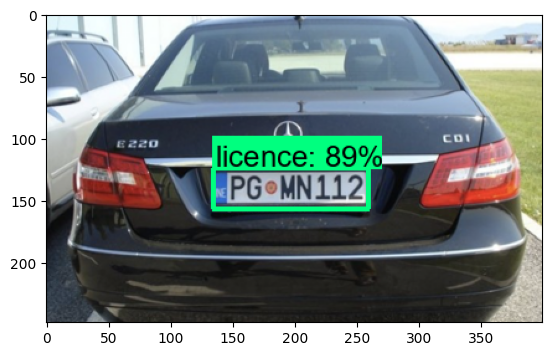

In [317]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

Swedish numbers look like that:
[218, 954], [459, 954], [459, 1081], [218, 1081]], 'MEP'
([[529, 952], [760, 952], [760, 1068], [529, 1068]], '838'